In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter2\Combined_5.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the unlabelled CSV file
unlabelled_data = pd.read_csv(r"C:\Users\KIIT\Desktop\las to csv\SB-4.csv")

# Keep a copy of the unlabelled data
labelled_data = unlabelled_data.copy()

# Remove the 'Facies' column from the unlabelled data
unlabelled_data.drop('Facies', axis=1, inplace=True)

# Define the parameters for the gradient boosting classifier
params = {
    'n_estimators': 163,
    'learning_rate': 0.016258128550853512,
    'max_depth': 53,
    'min_samples_split': 203,
    'min_samples_leaf': 205,
    'subsample': 0.9990808801724966
}

# Create a gradient boosting classifier object with the defined parameters
gb_classifier = GradientBoostingClassifier(**params)

# Train the classifier on the original training data
gb_classifier.fit(X_train, y_train)

# Load the test data from another CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable for the test data
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Get predicted probabilities for the test data
y_prob = gb_classifier.predict_proba(X_test)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print the area under the ROC curve
print("Area Under ROC Curve:", roc_auc)

# Use the trained classifier to predict labels for the unlabelled data
predicted_labels = gb_classifier.predict(unlabelled_data)

# Add the predicted labels to the labelled data
labelled_data['Facies'] = predicted_labels

# Store the labelled data in a new CSV file
labelled_data.to_csv(r"C:\Users\KIIT\Desktop\Iterations\iter2\L_SB-4.csv", index=False)


Accuracy: 0.9248554913294798
Area Under ROC Curve: 0.9868387645874481


In [3]:
import csv
import os

# Path to the folder containing CSV files
folder_path = r"C:\Users\KIIT\Desktop\Iterations\iter2"


# Get a list of all CSV files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Initialize a list to store the combined data
combined_data = []

# Iterate over each CSV file and append its data to the combined list
for file in file_list:
    file_path = os.path.join(folder_path, file)
    with open(file_path, "r") as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Read the header
        for row in reader:
            combined_data.append(row)

# Path and filename for the combined CSV file
combined_file_path = r"C:\Users\KIIT\Desktop\Iterations\iter2\Combined_6.csv"

# Write the combined data to a new CSV file
with open(combined_file_path, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)  # Write the header
    writer.writerows(combined_data)  # Write the data rows

print("CSV files combined successfully!")

CSV files combined successfully!


Accuracy: 0.9263005780346821
Confusion Matrix:
[[503   1   2   1   8]
 [  5  38   0   3   2]
 [  0   0   8   1   0]
 [ 11   2   3  24   0]
 [ 12   0   0   0  68]]
Area Under ROC Curve: 0.9876125222505031


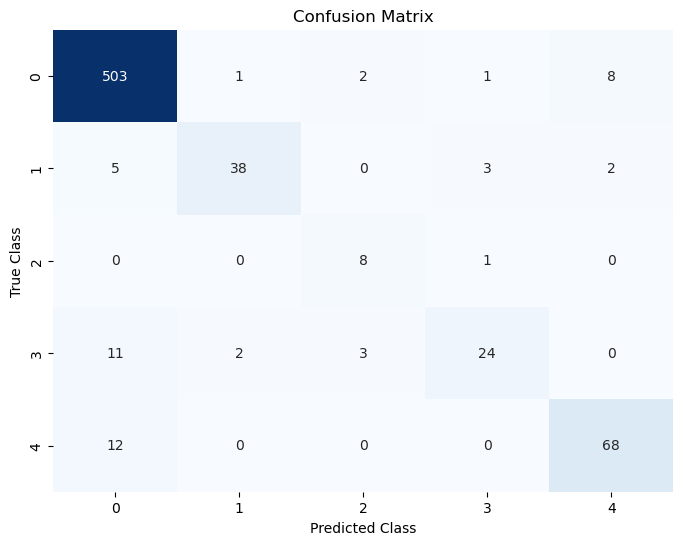

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter2\Combined_6.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the second CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Define the parameters for the gradient boosting classifier
params = {
    'n_estimators': 163,
    'learning_rate': 0.016258128550853512,
    'max_depth': 53,
    'min_samples_split': 203,
    'min_samples_leaf': 205,
    'subsample': 0.9990808801724966
}



# Create a gradient boosting classifier object with the defined parameters
gb_classifier = GradientBoostingClassifier(**params)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Get predicted probabilities
y_prob = gb_classifier.predict_proba(X_test)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Print the area under the ROC curve
print("Area Under ROC Curve:", roc_auc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Optimization

### simulated annealing

In [18]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to calculate the objective value (e.g., accuracy, F1 score)
def calculate_objective_value(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Function to generate a random neighbor solution
def generate_neighbor_solution(params, temperature):
    neighbor_params = params.copy()
    for param_name in params:
        value = params[param_name]
        if param_name == 'max_depth':
            range_min = max(1, value - int(temperature))
            range_max = value + int(temperature)
            neighbor_params[param_name] = np.random.randint(range_min, range_max + 1)
        elif param_name == 'min_samples_leaf':
            if isinstance(value, int):
                range_min = max(1, value - int(temperature))
                range_max = value + int(temperature)
                neighbor_params[param_name] = np.random.randint(range_min, range_max + 1)
            else:
                range_min = max(0.01, value - temperature)
                range_max = min(0.99999999999999, value + temperature)
                neighbor_params[param_name] = round(np.random.uniform(range_min, range_max), 2)
        elif isinstance(value, int):
            range_min = max(0, value - int(temperature))
            range_max = value + int(temperature)
            neighbor_params[param_name] = np.random.randint(range_min, range_max + 1)
        else:
            range_min = max(0.0, value - temperature)
            range_max = min(1.0, value + temperature)
            neighbor_params[param_name] = np.random.uniform(range_min, range_max)
    return neighbor_params

# Function to perform Simulated Annealing optimization
def perform_simulated_annealing(X_train, X_test, y_train, y_test, initial_params, max_iterations, initial_temperature, cooling_rate):
    current_params = initial_params.copy()
    current_classifier = GradientBoostingClassifier(**current_params)
    current_classifier.fit(X_train, y_train)
    current_pred = current_classifier.predict(X_test)
    current_value = calculate_objective_value(y_test, current_pred)

    best_params = current_params.copy()
    best_value = current_value

    for iteration in range(max_iterations):
        temperature = initial_temperature / (1 + cooling_rate * iteration)

        neighbor_params = generate_neighbor_solution(current_params, temperature)
        neighbor_classifier = GradientBoostingClassifier(**neighbor_params)
        neighbor_classifier.fit(X_train, y_train)
        neighbor_pred = neighbor_classifier.predict(X_test)
        neighbor_value = calculate_objective_value(y_test, neighbor_pred)

        delta_value = neighbor_value - current_value

        if delta_value > 0 or np.exp(delta_value / temperature) > np.random.uniform(0, 1):
            current_params = neighbor_params
            current_classifier = neighbor_classifier
            current_pred = neighbor_pred
            current_value = neighbor_value

        if neighbor_value > best_value:
            best_params = neighbor_params
            best_value = neighbor_value

    return best_params, best_value


# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter2\Combined_6.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the second CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']


# Define the initial parameters for the gradient boosting classifier
initial_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'subsample': 1.0
}

# Set the parameters for the Simulated Annealing optimization
max_iterations = 100
initial_temperature = 100.0
cooling_rate = 0.01

# Perform Simulated Annealing optimization
best_params, best_value = perform_simulated_annealing(X_train, X_test, y_train, y_test, initial_params, max_iterations, initial_temperature, cooling_rate)

# Print the optimized parameters
print("Optimized Parameters:")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

# Create a gradient boosting classifier object with the best parameters
gb_classifier = GradientBoostingClassifier(**best_params)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy and F1 score of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and the performance metrics
print("Best Parameters:", best_params)
print("Best Accuracy:", best_value)
print("Accuracy:", accuracy)

Optimized Parameters:
n_estimators: 100
learning_rate: 0.1
max_depth: 3
min_samples_split: 2
min_samples_leaf: 1
subsample: 1.0
Best Parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'subsample': 1.0}
Best Accuracy: 0.8945086705202312
Accuracy: 0.9046242774566474


Optimized Parameters:
n_estimators: 99
learning_rate: 0.9370277024799234
max_depth: 141
min_samples_split: 204
min_samples_leaf: 73
subsample: 0.8317950544372538
Best Parameters: {'n_estimators': 99, 'learning_rate': 0.9370277024799234, 'max_depth': 141, 'min_samples_split': 204, 'min_samples_leaf': 73, 'subsample': 0.8317950544372538}
Best Accuracy: 0.9248554913294798
Accuracy: 0.7384393063583815

### randomized search

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint, uniform

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter2\Combined_6.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the second CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Define the parameter distributions for randomized search
param_distributions = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.999999999999999),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.1, 1.0)
}

# Create a gradient boosting classifier object
gb_classifier = GradientBoostingClassifier()

# Perform randomized search for hyperparameter optimization
random_search = RandomizedSearchCV(gb_classifier, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_classifier = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the test set using the best classifier
y_pred = best_classifier.predict(X_test)

# Calculate the accuracy and F1 score of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

# Print the best parameters and the performance metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError: 

Best Parameters: {'learning_rate': 0.09134878064189968, 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 595, 'subsample': 0.9631385219890038}
Accuracy: 0.9205202312138728
F1 Score: 0.7889174154899443


### grid search

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint, uniform

# Load the training data from the first CSV file
train_data = pd.read_cs(vr"C:\Users\KIIT\Desktop\Iterations\iter2\Combined_6.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the second CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable
X_test = test_data.drop(''Facies, axis=1)
y_test = test_data['Facies']

# Define the parameter distributions for random search
param_distributions = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.999999999999999999999),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 1.0)
}

# Create a gradient boosting classifier object
gb_classifier = GradientBoostingClassifier()

# Perform random search for hyperparameter optimization
random_search = RandomizedSearchCV(gb_classifier, param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_classifier = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the test set using the best classifier
y_pred = best_classifier.predict(X_test)

# Calculate the accuracy and F1 score of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

# Print the best parameters and the performance metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
310 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError:

Best Parameters: {'learning_rate': 0.010520376995315819, 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 4, 'n_estimators': 458, 'subsample': 0.7646558531429417}
Accuracy: 0.9205202312138728
F1 Score: 0.8207705476819201


### bayes search

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from skopt import BayesSearchCV

# Load the training data from the first CSV file
train_data = pd.read_csv(r"C:\Users\KIIT\Desktop\Iterations\iter2\Combined_6.csv")

# Split the features and target variable
X_train = train_data.drop('Facies', axis=1)
y_train = train_data['Facies']

# Load the test data from the second CSV file
test_data = pd.read_csv(r"C:\Users\KIIT\Desktop\SB-10.csv")

# Split the features and target variable
X_test = test_data.drop('Facies', axis=1)
y_test = test_data['Facies']

# Define the search space for Bayesian optimization
param_space = {
    'n_estimators': (100, 1000),
    'learning_rate': (0.01, 0.9999999999999999, 'log-uniform'),
    'max_depth': (3, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'subsample': (0.6, 1.0, 'uniform')
}

# Create a gradient boosting classifier object
gb_classifier = GradientBoostingClassifier()

# Perform Bayesian optimization for hyperparameter tuning
bayes_search = BayesSearchCV(gb_classifier, param_space, n_iter=100, cv=5, scoring='accuracy')
bayes_search.fit(X_train, y_train)

# Get the best estimator and its corresponding parameters
best_classifier = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict on the test set using the best classifier
y_pred = best_classifier.predict(X_test)

# Calculate the accuracy and F1 score of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

# Print the best parameters and the performance metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Best Parameters: OrderedDict([('learning_rate', 0.01), ('max_depth', 10), ('min_samples_leaf', 10), ('min_samples_split', 2), ('n_estimators', 100), ('subsample', 0.6)])
Accuracy: 0.9219653179190751
F1 Score: 0.8286291486291487
